In [1]:
'''
r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLWHI/y-2020")
soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
whipsnakes20_dfs = pd.read_html(soup.prettify())
whipsnakes20_scoring_df = whipsnakes_dfs[0]
whipsnakes20_scoring_df['Team'] = 'whipsnakes'


whipsnakes20_goalkeep_df = whipsnakes_dfs[1]
display(whipsnakes_scoring_df)

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLWAT/y-2020")
team = "waterdogs"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
waterdogs20_dfs = pd.read_html(soup.prettify())

waterdogs20_scoring_df = waterdogs20_dfs[0]
waterdogs20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLRED/y-2020")
team = "redwoods"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
redwoods20_dfs = pd.read_html(soup.prettify())

redwoods20_scoring_df = redwoods20_dfs[0]
redwoods20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLCHR/y-2020")
team = "chrome"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
chrome20_dfs = pd.read_html(soup.prettify())

chrome20_scoring_df = chrome20_dfs[0]
chrome20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLCHA/y-2020")
team = "chaos"

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())
chaos20_dfs = pd.read_html(soup.prettify())

chaos20_scoring_df = chaos20_dfs[0]
chaos20_scoring_df['Team'] = team

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLATL/y-2020")
soup = BeautifulSoup(r.content, 'html.parser')
atlas20_dfs = pd.read_html(soup.prettify())
atlas20_scoring_df = atlas20_dfs[0]
atlas20_scoring_df['Team'] = "atlas"

r = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLARC/y-2020")
soup = BeautifulSoup(r.content, 'html.parser')
archers20_dfs = pd.read_html(soup.prettify())
archers20_scoring_df = archers20_dfs[0]
archers20_scoring_df['Team'] = "archers"'''

'\nr = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLWHI/y-2020")\nsoup = BeautifulSoup(r.content, \'html.parser\')\n#print(soup.prettify())\nwhipsnakes20_dfs = pd.read_html(soup.prettify())\nwhipsnakes20_scoring_df = whipsnakes_dfs[0]\nwhipsnakes20_scoring_df[\'Team\'] = \'whipsnakes\'\n\n\nwhipsnakes20_goalkeep_df = whipsnakes_dfs[1]\ndisplay(whipsnakes_scoring_df)\n\nr = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLWAT/y-2020")\nteam = "waterdogs"\n\nsoup = BeautifulSoup(r.content, \'html.parser\')\n#print(soup.prettify())\nwaterdogs20_dfs = pd.read_html(soup.prettify())\n\nwaterdogs20_scoring_df = waterdogs20_dfs[0]\nwaterdogs20_scoring_df[\'Team\'] = team\n\nr = req.get("https://www.statscrew.com/lacrosse/stats/t-PLLRED/y-2020")\nteam = "redwoods"\n\nsoup = BeautifulSoup(r.content, \'html.parser\')\n#print(soup.prettify())\nredwoods20_dfs = pd.read_html(soup.prettify())\n\nredwoods20_scoring_df = redwoods20_dfs[0]\nredwoods20_scoring_df[\'Team\'] = team\n\nr = r

# How to Win Premier Lacrosse League Games

By John Perret

## Introduction

The premier lacrosse league is a relatively new professional sports league. The Whipsnakes Lacrosse Club has won the championship both seasons. I'd like to see if there is a data science method to find out how they score goals stop the other team from scoring and then win games.

There are only seven teams and two seasons, so the dataset is very small compared to other sports however the processes used will scale when more data becomes avaliable

## Data Scrapping

First we'll import all the libraries we'll need as well as initialize some constants that will be used throughout the rest of the tasks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model

In [3]:
# initialize some constants
team_colors= {"Archers LC" : "#224279", "Atlas LC" : "#0ea2c0", "Chaos LC" : "#ed4849", "Chrome LC" : "#f3609e", "Redwoods LC" : "#483633", "Waterdogs LC" : "#978cd8", "Whipsnakes LC" : "#58c4b2"}
column_labels = {'PIM' : 'Penalties in minutes', 'Shts': "shots", 'SOG': 'Shots on goal', 'S%': "Shooting Percentage", 'SG%': "Shots on goal percentage", 'GB': "Ground Balls", 'TOC': "Turn overs committed", 'CTO': "Caused Turn overs", 'FO%': "Face off Percentage"}
SEASONS = [2019, 2020] # as more seasons are held add to the list
DECIMALS_PRINT = 2

## Source
There are multiple pages that data is being scrapped from. They are all from [statscrews.com 2020 Premier Lacrosse League Data](https://www.statscrew.com/lacrosse/l-PLL/y-2020).

Stats crew contains data for many different professional sports leagues for different sports.

First we will gather data on all the players in all the season. This requires going to each team's page for each season and scraping the table on the page. 
Luckily pandas has a function that we can use for scrapping an html table

Since we can select all values in the dataframe by the team column there is no need to save dataframes for each team.

In [4]:
# teams_dic converts team names into the url extension to get data on the team
teams_dic = {"Archers LC" : "t-PLLARC", "Atlas LC" : "t-PLLATL", "Chaos LC" : "t-PLLCHA", "Chrome LC" : "t-PLLCHR", "Redwoods LC" : "t-PLLRED", "Waterdogs LC" : "t-PLLWAT", "Whipsnakes LC" : "t-PLLWHI"}

players_df = pd.DataFrame() # dataframe for scoring data

for year in SEASONS:
    for team_name in teams_dic:
        r = req.get(f"https://www.statscrew.com/lacrosse/stats/{teams_dic[team_name]}/y-{year}")
        soup = BeautifulSoup(r.content, 'html.parser')
        new_df = pd.read_html(soup.prettify())[0]
        new_df['Team'] = team_name
        new_df['Year'] = year
        players_df = pd.concat([players_df, new_df],ignore_index=True)

players_df

,Player,Pos,GP,G,A,Pts,PIM,PPG,SHG,GWG,...,S%,SG%,GB,TOC,CTO,FO,FW,FO%,Team,Year
0,Tom Schreiber,M,10.0,17.0,18.0,37.0,NaN,0.0,0.0,0.0,...,28.8,58.6,9.0,22.0,1.0,0.0,0.0,NaN,Archers LC,2019
1,Marcus Holman,A,10.0,23.0,7.0,32.0,NaN,0.0,0.0,0.0,...,31.1,53.5,17.0,19.0,0.0,0.0,0.0,NaN,Archers LC,2019
2,Will Manny,A,10.0,22.0,7.0,30.0,NaN,0.0,0.0,0.0,...,29.7,44.0,7.0,20.0,1.0,0.0,0.0,NaN,Archers LC,2019
3,Ben McIntosh,M,10.0,11.0,2.0,13.0,NaN,0.0,0.0,0.0,...,25.0,40.7,7.0,7.0,0.0,0.0,0.0,NaN,Archers LC,2019
4,Christian Cuccinello,A,8.0,8.0,4.0,12.0,NaN,0.0,0.0,0.0,...,28.6,47.1,10.0,7.0,0.0,0.0,0.0,NaN,Archers LC,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Joe McCallion,M,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,1.0,0.0,11.0,4.0,36.4,Whipsnakes LC,2020
325,Jacob Stover,G,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,Whipsnakes LC,2020
326,Tyler Warner,M,6.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,...,0.0,0.0,16.0,2.0,0.0,0.0,0.0,NaN,Whipsnakes LC,2020
327,Jake Bernhardt,"M,F",6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,7.0,0.0,0.0,NaN,Whipsnakes LC,2020


Columns explained. This is additional data on the html page for each team. I decided it was easier to copy all the column titles by hand rather than scrape them

| Column Title | Explanation |
| ----------- | ----------- |
| Player | Player Name |
| Pos | Position |
| GP | Games Played |
| G | Goals |
| A | Assists |
| Pts | Points: goals + assists |
| PIM | Penalties in minutes |
| PPG | Power Play Goals |
| SHG | Short Hand Goals |
| GWG | Game Winning Goals |
| Shts | Shots |
| SOG | Shots On Goal |
| S% | Shooting Percentage |
| SG% | Shots On Goal Percentage |
| GB | Ground Balls |
| TOC | Turnovers Committed |
| CTO | Caused Turnovers |
| FO | Faceoffs |
| FW | Faceoffs Won |
| FO% | Faceoff Win Percentage |
| Team | Team |
| year | Year |

Next we will collecting the regular season standings. The 2020 season for example can be found [here](https://www.statscrew.com/lacrosse/standings/l-PLL/y-2020).

In [5]:
standings = pd.DataFrame()
for year in SEASONS:
    r = req.get(f"https://www.statscrew.com/lacrosse/standings/l-PLL/y-{year}")
    soup = BeautifulSoup(r.content, 'html.parser')
    s = pd.read_html(soup.prettify())[0]
    s['Year'] = year
    s.drop("Unnamed: 5", axis=1, inplace=True)
    s.drop("Unnamed: 6", axis=1, inplace=True)
    standings = pd.concat([standings, s], ignore_index=True)

standings['win_pct'] = standings['W']/(standings.W+standings.L)
standings['avg_gf'] = standings['GF']/(standings.W+standings.L)
standings['avg_ga'] = standings['GA']/(standings.W+standings.L)

standings

,Team,W,L,GF,GA,Year,win_pct,avg_gf,avg_ga
0,Chaos LC,7,3,118,126,2019,0.700000,11.800000,12.600000
1,Whipsnakes LC,6,4,116,109,2019,0.600000,11.600000,10.900000
2,Archers LC,5,5,105,100,2019,0.500000,10.500000,10.000000
3,Redwoods LC,5,5,112,106,2019,0.500000,11.200000,10.600000
4,Atlas LC,5,5,117,122,2019,0.500000,11.700000,12.200000
5,Chrome LC,2,8,120,125,2019,0.200000,12.000000,12.500000
6,Whipsnakes LC,6,0,82,51,2020,1.000000,13.666667,8.500000
7,Archers LC,4,2,64,68,2020,0.666667,10.666667,11.333333
8,Chrome LC,3,2,64,64,2020,0.600000,12.800000,12.800000
9,Redwoods LC,3,3,62,63,2020,0.500000,10.333333,10.500000


Similar to the scoring data I decided it would be easier to copy column title explanations by hand

| Column Title | Explanation |
| ----------- | ----------- |
| Team | Team |
| W | Wins |
| L | Losses |
| GF | Goals For |
| GA | Goals Against |
| year | Year |

In [6]:
teams_df = players_df.loc[players_df['Player'] == 'Totals']
teams_df = teams_df.dropna(axis=1, how='all')
teams_df = teams_df.drop(teams_df.loc[teams_df['Team'] == 'Waterdogs LC'].loc[teams_df['Year'] == 2019].index, axis=0)
teams_df = teams_df.drop(['Player'], axis=1)
teams_df = teams_df.merge(standings, on=['Team', 'Year'])

players_df.drop(players_df.loc[players_df['Player'] == 'Totals'].index, axis=0, inplace=True)

teams_df

,GP,G,A,Pts,PIM,PPG,SHG,GWG,Shts,SOG,...,FO%,Team,Year,W,L,GF,GA,win_pct,avg_gf,avg_ga
0,197.0,106.0,68.0,180.0,0.0,0.0,0.0,0.0,439.0,259.0,...,46.5,Archers LC,2019,5,5,105,100,0.500000,10.500000,10.000000
1,189.0,117.0,73.0,198.0,0.0,0.0,0.0,0.0,402.0,248.0,...,61.6,Atlas LC,2019,5,5,117,122,0.500000,11.700000,12.200000
2,192.0,118.0,67.0,197.0,0.0,0.0,0.0,0.0,382.0,234.0,...,47.3,Chaos LC,2019,7,3,118,126,0.700000,11.800000,12.600000
3,194.0,120.0,61.0,188.0,0.0,0.0,0.0,0.0,415.0,246.0,...,50.5,Chrome LC,2019,2,8,120,125,0.200000,12.000000,12.500000
4,193.0,114.0,62.0,178.0,0.0,0.0,0.0,0.0,435.0,252.0,...,41.9,Redwoods LC,2019,5,5,112,106,0.500000,11.200000,10.600000
5,186.0,113.0,71.0,196.0,0.0,0.0,0.0,0.0,442.0,246.0,...,51.8,Whipsnakes LC,2019,6,4,116,109,0.600000,11.600000,10.900000
6,132.0,63.0,35.0,99.0,8.0,4.0,0.0,0.0,213.0,143.0,...,48.0,Archers LC,2020,4,2,64,68,0.666667,10.666667,11.333333
7,108.0,43.0,25.0,71.0,14.5,3.0,0.0,0.0,202.0,110.0,...,50.0,Atlas LC,2020,1,4,46,58,0.200000,9.200000,11.600000
8,153.0,67.0,32.0,102.0,14.0,4.0,0.0,0.0,255.0,157.0,...,35.3,Chaos LC,2020,2,5,70,78,0.285714,10.000000,11.142857
9,109.0,61.0,32.0,96.0,14.0,6.0,0.0,0.0,190.0,109.0,...,56.7,Chrome LC,2020,3,2,64,64,0.600000,12.800000,12.800000


Normally in the data science progression this is where we would tidy up our data. We are lucky enough to have the data already tidy enough for our use.

There is some missing data for some seasons, but the Nan's in the dataframe will be okay in further analysis.

Optionally we could've replaced np.nan with pd.na to clarrift that the data is missing and not "not a number" however for this excersise we know that np.nan represents a missing value.

## What is more relevant to wins? Goals for or goals against

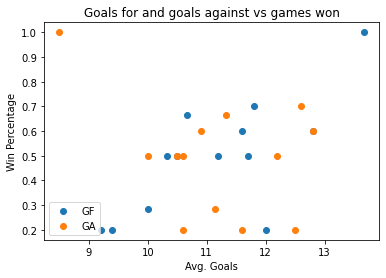

In [7]:
plt.scatter(standings.avg_gf, standings.win_pct, label = "GF")
plt.scatter(standings.avg_ga, standings.win_pct, label = "GA")
plt.legend()
plt.title("Goals for and goals against vs games won")
plt.xlabel("Avg. Goals")
plt.ylabel("Win Percentage")
plt.show()

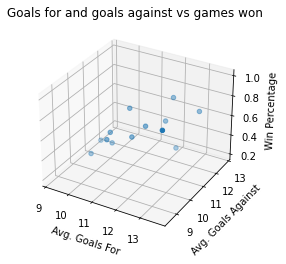

In [8]:
ax = plt.axes(projection ="3d")
ax.scatter(standings.avg_gf, standings.avg_ga, standings.win_pct)
plt.title("Goals for and goals against vs games won")
ax.set_xlabel("Avg. Goals For")
ax.set_ylabel("Avg. Goals Against")
ax.set_zlabel("Win Percentage")
plt.show()

Since in the two seasons there were a different number of games played I decided to normalize the number of goals scored and use win percentage instead of number of wins.

Ideally when graphing 2 features of a model we use an axis for each feature. Due to the minimal amount of data avaliable I didn't think the 3D graph was very easy to interpret so I also included a 2D graph.

There is not a lot of points to show a clear linear relationship, but we can assume one.



Now lets perform a linear regression with goals for and goals against. I'm going to do one for unnormalized data first then normalized data after to compare.

In [9]:
X = standings[['avg_gf', 'avg_ga']] # drop everything except goals for and against.
y = standings.win_pct
num_wins_regr = linear_model.LinearRegression().fit(X, y)
regr_str = f"Win Percentage = {num_wins_regr.intercept_} + {num_wins_regr.coef_[0]} * avg. goals for + {num_wins_regr.coef_[1]} * avg. goals against"
print(regr_str)

Win Percentage = -0.1593287599003394 + 0.12906449148107754 * avg. goals for + -0.07002859726332156 * avg. goals against


By this analysis scoring goals is more important than stopping goals. Each goal scored will have a greater impact on the number of wins than each goal scoared against.

Since we believe scoring goals to be more important than stopping goals, lets continue our analysis to determine what is the most important statistic for scoring goals. For this analysis we'll compare the columns in the scoring table.

We won't use all of the columns in the scoring dataframe because there are certain things we cannot change. For example, we won't use the position column because we can't have 10 midfielders on the feild at once even if they're the most likely to be scoring goals.

I am not comparing players at the current moment so I will use the total rows for each team and season from the table.

I will also ignore columns that are dependent of goals. For example assits and faceoffs happen whenever there is a goal so there is a strong linear relationship.

A list of the columns being used are as follows:

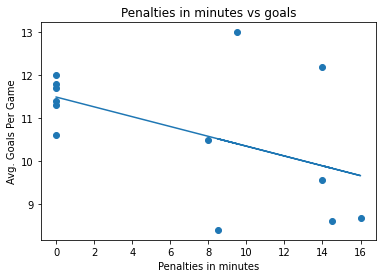

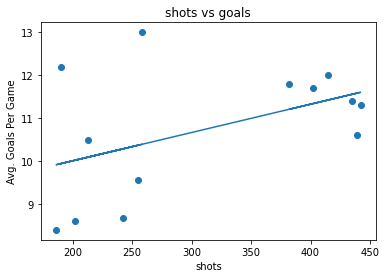

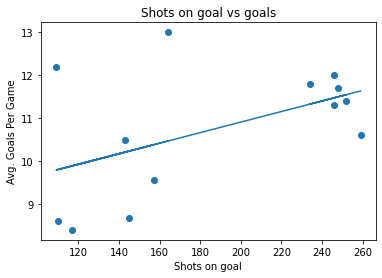

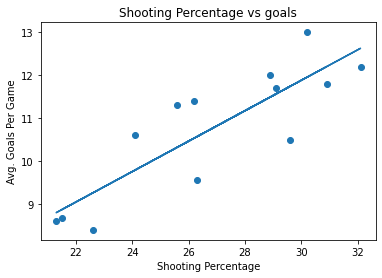

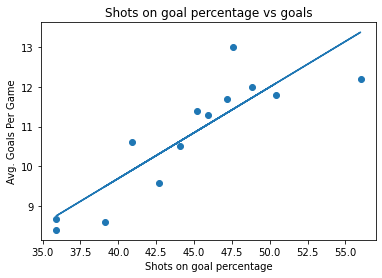

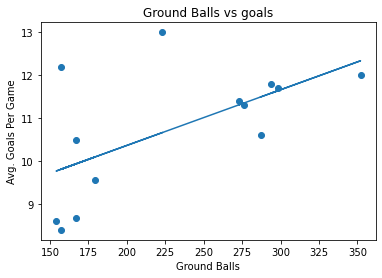

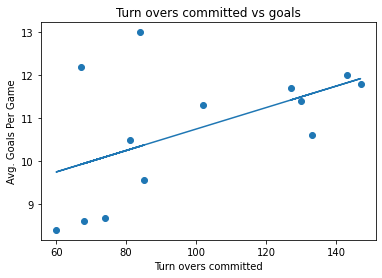

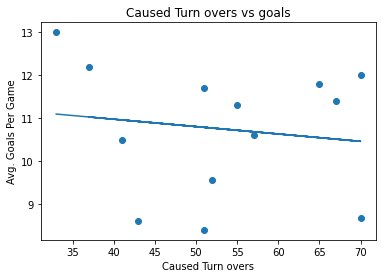

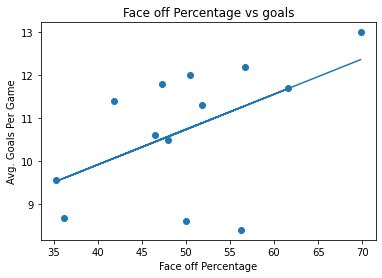

In [10]:
shots_regr_cols = ['PIM', 'Shts', 'SOG', 'S%', 'SG%', 'GB', 'TOC', 'CTO', 'FO%']
shots_regr_cols_data = {}
for c in shots_regr_cols: 
    shots_regr_cols_data[c] = ([],[])
for year in SEASONS:
    for team_name in teams_dic:
        row = teams_df.loc[teams_df['Team'] == team_name].loc[teams_df['Year'] == year]
        if len(row) > 0:
            row = row.iloc[0]
            for c in shots_regr_cols: 
                if not (np.isnan(row[c]) or np.isnan(row['G'])):
                    standings_row = standings.loc[standings['Team'] == team_name].loc[standings['Year'] == year]
                    games_played = standings_row.W + standings_row.L
                    shots_regr_cols_data[c][0].append(row[c])
                    shots_regr_cols_data[c][1].append(row['G']/games_played)

            
i = 1
                
for c in shots_regr_cols: 
    plt.figure(i)
    x = shots_regr_cols_data[c][0]
    y = shots_regr_cols_data[c][1]
    plt.scatter(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*np.array(x) + b)
    plt.title(f'{column_labels[c]} vs goals')
    plt.xlabel(column_labels[c])
    plt.ylabel("Avg. Goals Per Game")
    i+=1

Most models have the linear regression we'd expect. There are two graphs that caught my attention. The first being  TOC vs goals. In theory more turnovers should lead to less goals since the team committing the turn over no longer has the ball. According to the calculated relationship more turnovers committed is directly related to number of goals scored. This could be due to the fact that if a team has the ball more they will therefore commit more turnovers and turnovers committed doesn't have a direct relationship with goals.

Additionally committed turnovers didn't have a significant impact on goals scored this could also be explained by my hypothesis of possession time. Unfortunately I was unable to find data with possession statistics.

# More complicated linear regression with more datapoints

In [11]:
X = teams_df[shots_regr_cols]
y = teams_df['win_pct']

num_wins_regr = linear_model.LinearRegression().fit(X, y)
print(num_wins_regr.coef_)
regr_str = f"Win Percentage = {round(num_wins_regr.intercept_, DECIMALS_PRINT)}"
for i in range(len(num_wins_regr.coef_)):
    regr_str += f" + ({round(num_wins_regr.coef_[i], DECIMALS_PRINT)} * {column_labels[shots_regr_cols[i]]})"
print(regr_str)

[ 0.08229208  0.05245338 -0.07996145  0.54488846 -0.30317444 -0.01257543
  0.02320928  0.01531158  0.04875531]
Win Percentage = -5.26 + (0.08 * Penalties in minutes) + (0.05 * shots) + (-0.08 * Shots on goal) + (0.54 * Shooting Percentage) + (-0.3 * Shots on goal percentage) + (-0.01 * Ground Balls) + (0.02 * Turn overs committed) + (0.02 * Caused Turn overs) + (0.05 * Face off Percentage)


The regression is hard to interpret since there is not a standard range. For example, 1 penalty minute has a bigger impact on win percentage than 1 shot. According to the model shots on goal hurt win percentage.


Should do a residuals graph. What to group by?


## Conclusion

While there is very little data the professional lacrosse league, we were able to make predictions given the avaliable data.